In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB39A_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB39A.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.414678
1,0.006279,0.324629
2,0.013343,0.729851
3,0.020407,0.009455
4,0.027471,0.189554
...,...,...
266,0.985872,0.009455
267,0.989013,0.013958
268,0.992938,0.009455
269,0.996076,0.009455


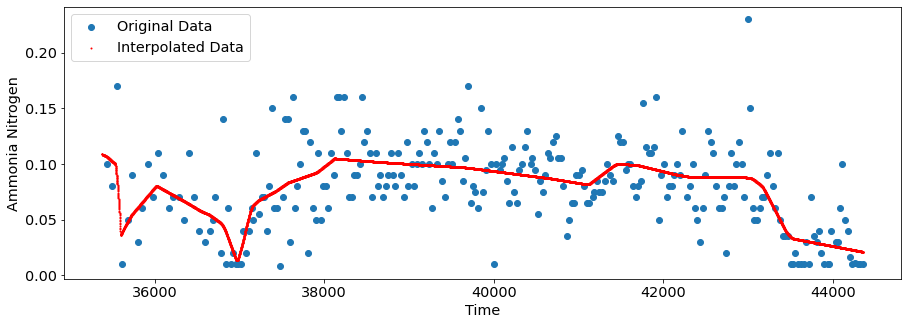

313/313 [==============================] - 0s 401us/step - loss: 3.3838e-16
['loss']


In [2]:
#Transform the normalized scale to real scale
AN_min = 0.0079
AN_max = 0.23
time_min = 35438.00       
time_max = 44356.47       

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.003363805
,0.009979288
,0.016819024
,0.023658761
,0.030498497
,0.037338234
,0.044290097
,0.05090558
,0.057745316
,0.064585053
,0.071424789
,0.078264526
,0.085216389
,0.091831872
,0.098671609
,0.105511345
,0.112351082
,0.119190818
,0.126142681
,0.132870291
,0.146549764
,0.672088206
,0.764256459
])
interpolation

array([[0.43502748],
       [0.4176858 ],
       [0.21564728],
       [0.15948844],
       [0.19724438],
       [0.22558098],
       [0.25062978],
       [0.2744666 ],
       [0.29911143],
       [0.32375622],
       [0.31664333],
       [0.30493012],
       [0.2930249 ],
       [0.28169566],
       [0.2699825 ],
       [0.25825584],
       [0.24586253],
       [0.23329791],
       [0.22165821],
       [0.21273836],
       [0.18504637],
       [0.41063038],
       [0.3660237 ]], dtype=float32)